In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

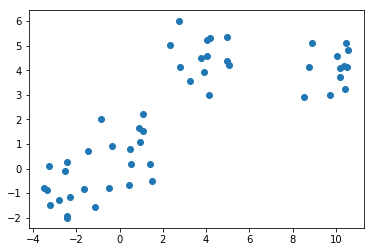

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

In [4]:
agc = AgglomerativeClustering(n_clusters=4,linkage='average')

In [5]:
agc.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4,
            pooling_func=<function mean at 0x000002515840ED08>)

In [6]:
plt.figure(figsize=(8,6))
x_min = np.min(X1,axis=0)
x_max = np.max(X1,axis=0)
X1 = (X1-x_min)/(x_max-x_min)

<Figure size 576x432 with 0 Axes>

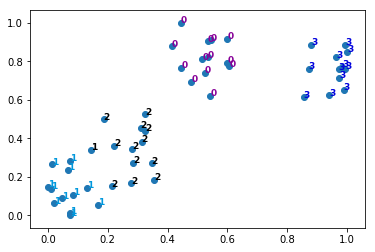

In [8]:
for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agc.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
plt.scatter(X1[:,0],X1[:,1])    
plt.show()

In [9]:
print(distance_matrix(X1,X1))

[[0.         1.03404932 0.15116921 ... 0.64172075 1.01751401 0.21745765]
 [1.03404932 0.         1.0599763  ... 0.4612143  0.01721206 0.82169102]
 [0.15116921 1.0599763  0.         ... 0.71422993 1.04292734 0.25313879]
 ...
 [0.64172075 0.4612143  0.71422993 ... 0.         0.44819834 0.46160586]
 [1.01751401 0.01721206 1.04292734 ... 0.44819834 0.         0.80493473]
 [0.21745765 0.82169102 0.25313879 ... 0.46160586 0.80493473 0.        ]]


c:\python\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


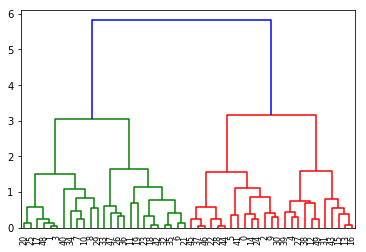

In [11]:
z = hierarchy.linkage(distance_matrix(X1,X1),'complete')
z = hierarchy.dendrogram(z)